In [ ]:
#ANN(SVM)
#reference:https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E6%94%AF%E6%92%90%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-svm-%E8%A9%B3%E7%B4%B0%E6%8E%A8%E5%B0%8E-c320098a3d2e
'''
SVM(support vector machine)
把數據點維度升高，變成線性可分割
SVM找一個決策邊界，讓兩類之間的邊界最大化，使其可以完美區隔開來。
'''

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 10)
import warnings
warnings.filterwarnings('ignore')
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["target"]=iris["target"]
df = df.drop(["sepal width (cm)","petal width (cm)"], axis = 1)
df.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [2]:
#使用sklearn的linearSVC
#SVM也可以拿來做回歸:擬合出方程式來預測下一個連續數值
#SVC-Classification

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
clf=LinearSVC()
clf = clf.fit(df.drop(['target'],axis=1),df["target"])

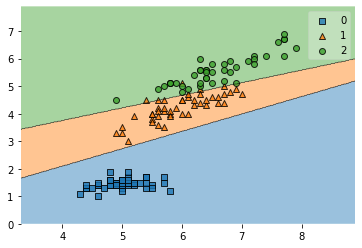

In [3]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(df.drop(['target'],axis=1),df["target"],test_size=0.1)
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

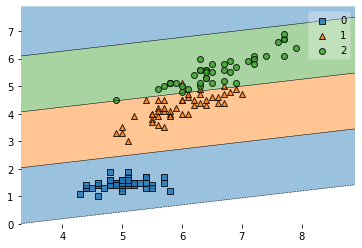

In [4]:
#SVR-Regression
from sklearn.svm import LinearSVR
from sklearn.metrics import accuracy_score
clf=LinearSVR()
clf = clf.fit(df.drop(['target'],axis=1),df["target"])
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

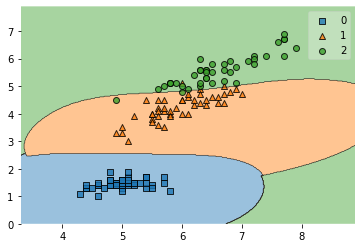

In [5]:
#非線性SVM:使用提高維度的方式EX:X1^2+X2^2=r^2，製造兩新特徵x1^2、x2^2就可用線性分類解決曲線問題
from sklearn.svm import SVC
#rbf函數:兩高維度向量的內積會變成原向量的距離度量
clf=SVC(kernel='rbf')
clf = clf.fit(df.drop(['target'],axis=1),df["target"])
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

In [6]:
#XOR問題
from numpy import random
x1 = random.choice([True,False],100)
x2 = random.choice([True,False],100)
y = np.logical_xor(x1, x2)
df= pd.DataFrame(columns=["x1","x2","y"])
df["x1"]=x1
df["x2"]=x2
df["y"]=y
df = df.astype(int)
df.head(10)

,x1,x2,y
0,1,1,0
1,1,0,1
2,1,0,1
3,0,0,0
4,1,1,0
5,0,0,0
6,0,1,1
7,0,0,0
8,0,0,0
9,0,0,0


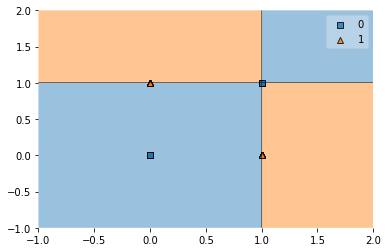

In [7]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

clf = SVC(kernel='rbf')
clf=clf.fit(df.drop(['y'],axis=1),df['y'])
plot_decision_regions(X=np.array(df.drop(['y'],axis=1)),y=np.array(df['y']),clf = clf)
#成功解決oxr問題